# SRM INSTITUTE OF SCIENCE AND TECHNOLOGY
Program: M. Tech /DSAI

Course Title : 20PAIE51J - Machine Learning - Unsupervised model
Name of the Project Members: CT1 Project Group 11

Shafeena Farheen

Kannan T

Jeevanandhan A


Hiearchial Clustering

a. Import required Library (2 marks)



In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# import functions from sklearn to perform clustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Disable warnings
import warnings
warnings.simplefilter('ignore')

This code imports several Python libraries that are commonly used for data analysis and machine learning tasks. The first set of libraries - pandas, numpy, seaborn, matplotlib, and scipy.stats - are used for data manipulation, analysis, and visualization.

The second set of libraries - train_test_split, LinearRegression, Lasso, Ridge, ElasticNet, PolynomialFeatures, MinMaxScaler, LabelEncoder, SVR, r2_score, and mean_squared_error - are used for machine learning tasks such as regression, data preprocessing, and evaluation of model performance.

Finally, the warnings library is used to suppress warning messages that might be generated by other code.

## b. Read the dataset (tab, csv, xls, txt, inbuilt dataset). (1 mark)

In [2]:
# Load data from a CSV file into a pandas DataFrame
import pandas as pd
df = pd.read_csv("MPA-1_forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
#describe() method to get summary statistics 
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df.shape

(517, 13)

In [8]:
df.drop(['X','Y'], axis=1, inplace=True)

In [9]:
# Check for missing values
df.isnull().sum().any()

False

In [10]:
# Check for missing values
print(df.isna().sum())

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [11]:
df[df.rain==0.0].shape

(509, 11)

In [12]:
df[df.area==0.0].shape

(247, 11)

In [13]:
# coping the original dataframe to df_copy 
df_copy = df.copy()

## c. Perform explanotory data analysis on the dataset. (3 marks)

In [14]:
df.skew()

FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

In [15]:
# The categorical features are stored in df_cat
df_cat = df.select_dtypes(include = 'object')
# Displaying the columns present in df_cat 
print(df_cat.columns)

# The numerical features are stored in df_num
df_num = df.select_dtypes(exclude = 'object')
# Displaying the columns present in the df_num
print(df_num.columns)

Index(['month', 'day'], dtype='object')
Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')


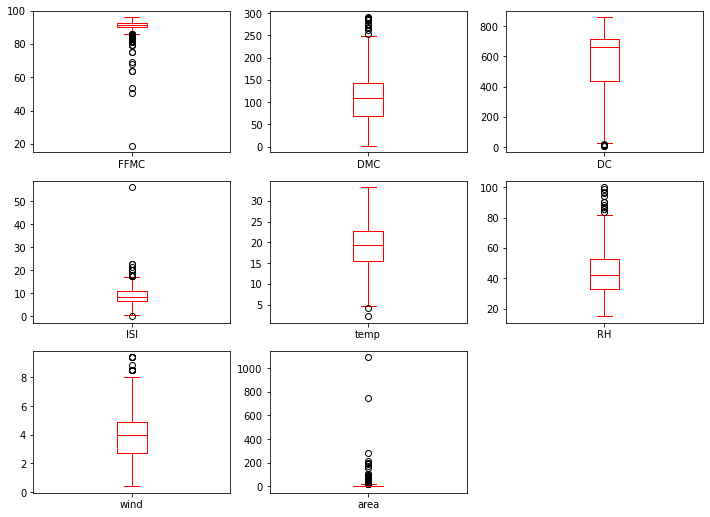

In [16]:
# Check for outliers using box plots
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','area']
df[num_cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(12,12), color = 'red')
plt.show()

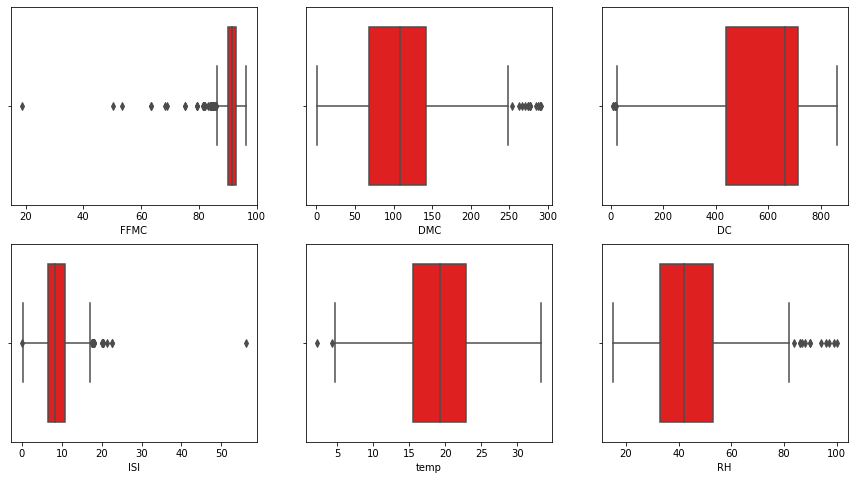

(517, 11)


In [17]:
# consider the numeric variables
df_num = df.select_dtypes(exclude='object')

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df[variable], ax = subplot, color = 'red')

# display the plot
plt.show()
print(df.shape)

In [18]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# define the lower and upper limits for capping the outliers
# any value below Q1-1.5*IQR is considered as outlier and is set to Q1-1.5*IQR
# any value above Q3+1.5*IQR is considered as outlier and is set to Q3+1.5*IQR
lower_cap = Q1 - 1.5*IQR
upper_cap = Q3 + 1.5*IQR

# capping the outliers in each numeric variable
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = np.where(df[col] < lower_cap[col], lower_cap[col], df[col])
        df[col] = np.where(df[col] > upper_cap[col], upper_cap[col], df[col])


# check the shape of the data
df.shape

(517, 11)

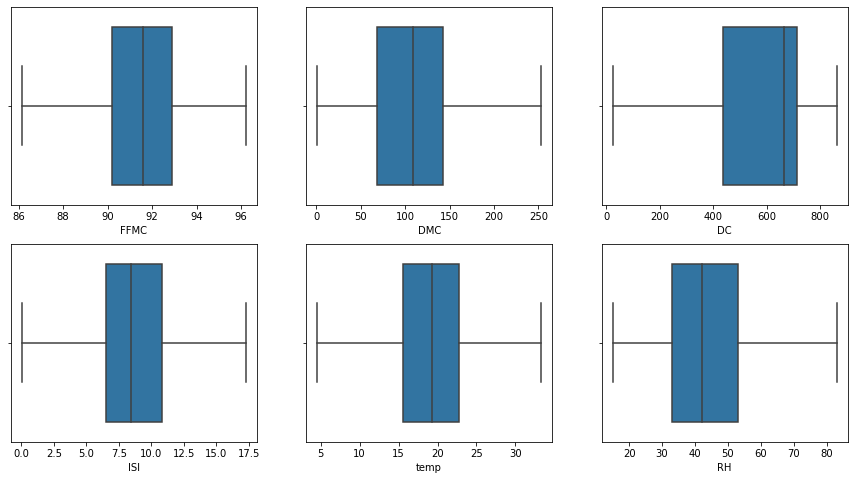

(517, 11)


In [19]:
# consider the numeric variables
df_num = df.drop(['month','day'], axis = 1)
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df[variable], ax = subplot)

# display the plot
plt.show()
print(df.shape)

Interpretation: Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that we can see in some of the variables are moderate outliers that lied within the min/max range before removing the actual outliers.

Also, the number of observations is 517,11. Thus, we have removed the potential outliers via capping method.

In [20]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
month,0,0.0
day,0,0.0
FFMC,0,0.0
DMC,0,0.0
DC,0,0.0
ISI,0,0.0
temp,0,0.0
RH,0,0.0
wind,0,0.0
rain,0,0.0


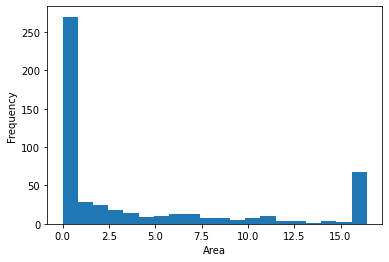

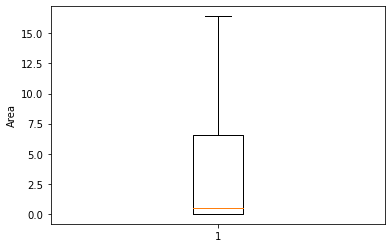

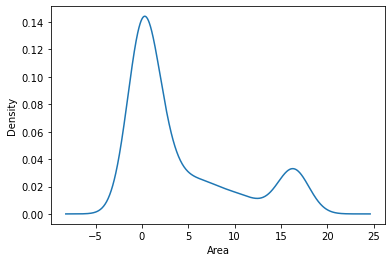

In [21]:
import matplotlib.pyplot as plt

# create a histogram of the 'area' column
plt.hist(df['area'], bins=20)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# create a boxplot of the 'area' column
plt.boxplot(df['area'])
plt.ylabel('Area')
plt.show()

# create a density plot of the 'area' column
df['area'].plot(kind='density')
plt.xlabel('Area')
plt.show()

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num = df.select_dtypes(exclude='object')

# calculate skewness before transformation
skew_before = df.skew()
print("Skewness before transformation:\n", skew_before)

# The power tranformation- yeojohnson is applied to the numerical features
for i in df_num.columns:
    df_num[i],parameter = stats.yeojohnson(df_num[i])

# Displaying the first record
df_num.head()

drop_skew_cols = True
test_drop_skew_cols = ['rain']
if drop_skew_cols:
    df_num.drop(test_drop_skew_cols,axis=1,inplace=True)

# standardize the data using StandardScaler
scaler = StandardScaler()


# Applying fit and transorm on the numerical features
features_scaled = scaler.fit_transform(df_num)

# create a new dataframe with the scaled features
df_scaled = pd.DataFrame(features_scaled, columns=df_num.columns)

# print the transformed data and skewness comparison
print("Scaled Data with StandardScaler:\n", df_scaled)

# calculate skewness after scaling
skew_after_transform = df_scaled.skew()
print("\nSkewness after Yeo Jhonson transformation:\n", skew_after_transform)

Skewness before transformation:
 FFMC   -0.588609
DMC     0.385411
DC     -1.098354
ISI     0.381614
temp   -0.317044
RH      0.691167
wind    0.452878
rain    0.000000
area    1.258677
dtype: float64
Scaled Data with StandardScaler:
          FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -1.790438 -1.454629 -1.782424 -0.963347 -1.764148  0.580444  1.437870   
1   -0.393872 -1.240825  0.458317 -0.506998 -0.201907 -0.642790 -2.167099   
2   -0.393872 -1.062782  0.551747 -0.506998 -0.778813 -0.642790 -1.784780   
3    0.052592 -1.287902 -1.815859  0.098902 -1.749958  1.973752  0.105409   
4   -0.867159 -0.909055 -1.765679  0.249297 -1.289831  1.973752 -1.359623   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.803232 -0.804249  0.440082 -2.018708  1.619934 -0.728344 -0.697404   
513 -1.803232 -0.804249  0.440082 -2.018708  0.497105  1.524429  1.030594   
514 -1.803232 -0.804249  0.440082 -2.018708  0.368936  1.483730  1.43787

In [23]:
# Printing the unique value of categorical value to check what kind of encoding to be applied
print("Categorical Unique month's from the month columns:",df_cat.month.unique())
print("Categorical Unique month's from the day columns:",df_cat.day.unique())

# The encoding technique - ordinal encoding is applied on categorical variable

# Creating new object and passing the month values in the categories
encode_month = OrdinalEncoder(categories=[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])

# Creating new object and passing the day values in the categories
encode_day = OrdinalEncoder(categories=[['sun','mon','tue','wed','thu','fri','sat']])

# Applying fit and transform on the month feature value and storing the encoding value in new feature 'month_encoded'
df_cat['month_encoded'] = encode_month.fit_transform(df_cat.month.values.reshape(-1,1))

# Applying fit and transform on the day feature value and storing the encoding value in new feature 'day_encoded'
df_cat['day_encoded'] = encode_day.fit_transform(df_cat.day.values.reshape(-1,1))

# dropping the original columns
df_cat_encoded = df_cat.drop(['month','day'], axis=1)

# Displaying the encoded value
df_cat_encoded.head()

Categorical Unique month's from the month columns: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Categorical Unique month's from the day columns: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


,month_encoded,day_encoded
0,2.0,5.0
1,9.0,2.0
2,9.0,6.0
3,2.0,5.0
4,2.0,0.0


In [24]:
# Concating the numerical and encoded cat features
df_scaled['month'] = df_cat_encoded.month_encoded
df_scaled['day'] = df_cat_encoded.day_encoded

# Displaying the first 5 records
df_scaled.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,area,month,day
0,-1.790438,-1.454629,-1.782424,-0.963347,-1.764148,0.580444,1.437870,-0.946047,2.0,5.0
1,-0.393872,-1.240825,0.458317,-0.506998,-0.201907,-0.642790,-2.167099,-0.946047,9.0,2.0
2,-0.393872,-1.062782,0.551747,-0.506998,-0.778813,-0.642790,-1.784780,-0.946047,9.0,6.0
3,0.052592,-1.287902,-1.815859,0.098902,-1.749958,1.973752,0.105409,-0.946047,2.0,5.0
4,-0.867159,-0.909055,-1.765679,0.249297,-1.289831,1.973752,-1.359623,-0.946047,2.0,0.0


<AxesSubplot:>

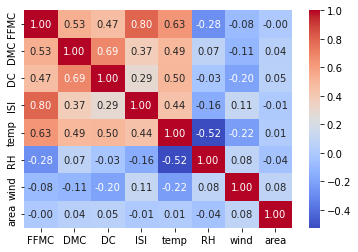

In [25]:
# Explore correlations
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

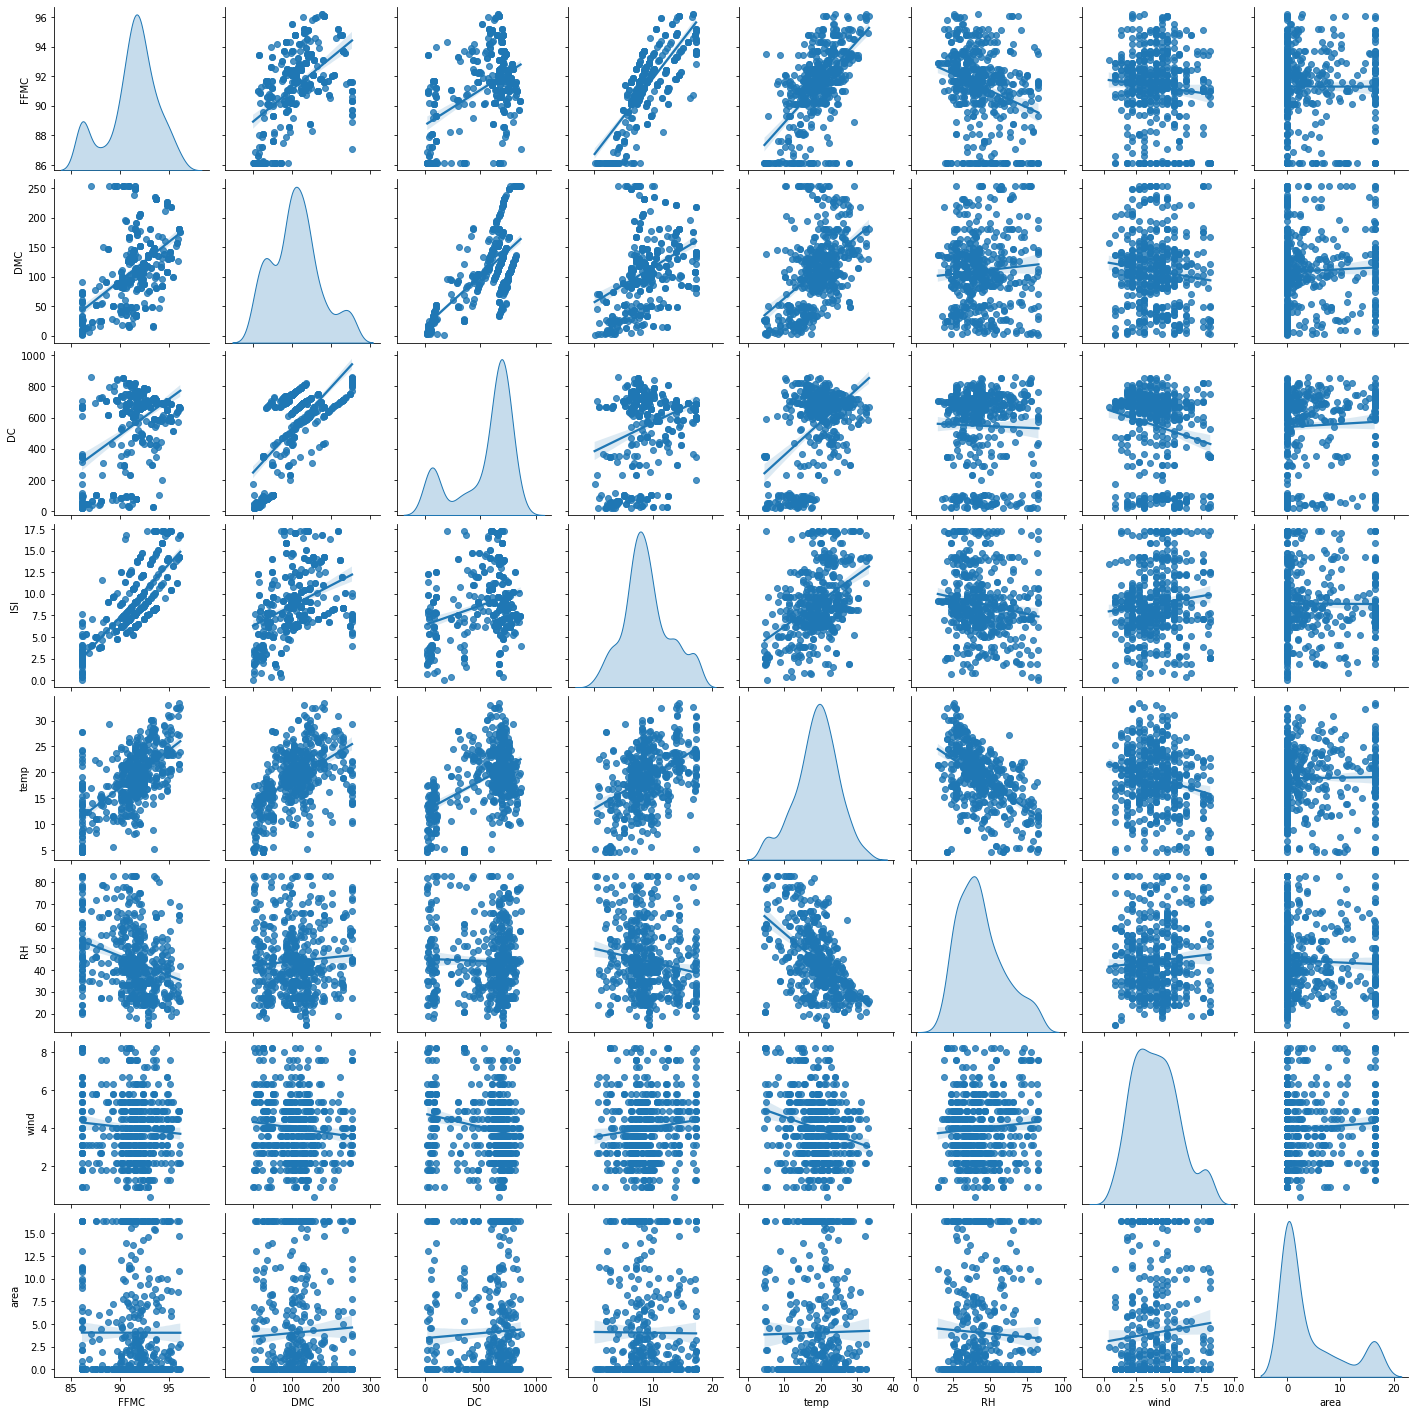

In [26]:
sns.pairplot(data=df[num_cols], kind='reg', diag_kind='kde')

d. Plot the datapoints using Scatter Plot. (3 marks)

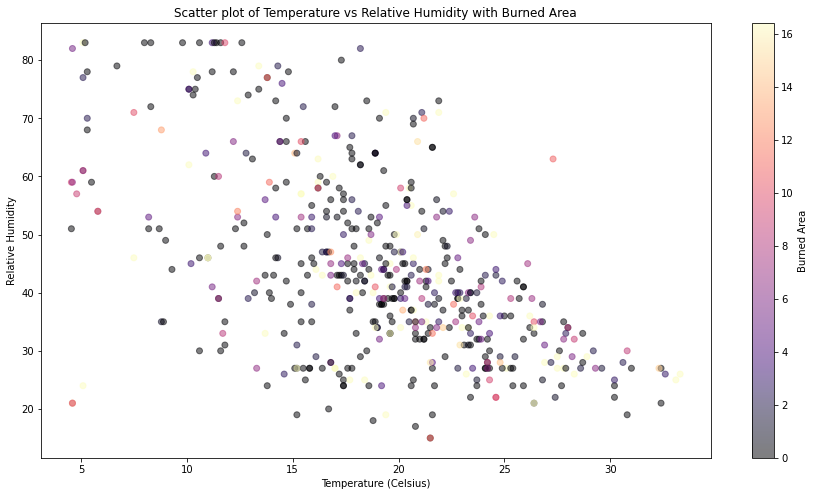

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.scatter(df['temp'], df['RH'],c=df['area'],cmap='magma', alpha=0.5)
plt.colorbar(label='Burned Area')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity')
plt.title('Scatter plot of Temperature vs Relative Humidity with Burned Area')
plt.show()

INFERENCES:
From the scatter plot, we can see that there is a cluster of data points with area=0, which suggests that most forest fires have an area of 0. The few data points with a larger area are scattered and widely dispersed, indicating that forest fires with a large area are relatively rare. We can also observe some correlation between temperature and humidity, which is expected as higher temperatures tend to lower the relative humidity. There does not seem to be any strong correlation between other variables, although some weak correlations may be present.

e. Apply five methods of agglomerative hierachial clustering. [Single, complete, average, centroid and ward's linkage method] (2 marks)

In [28]:
df_scaled.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area', 'month',
       'day'],
      dtype='object')

In [29]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrices
linkage_single = linkage(df_scaled, method='single')
linkage_complete = linkage(df_scaled, method='complete')
linkage_average = linkage(df_scaled, method='average')
linkage_centroid = linkage(df_scaled, method='centroid')
linkage_ward = linkage(df_scaled, method='ward')

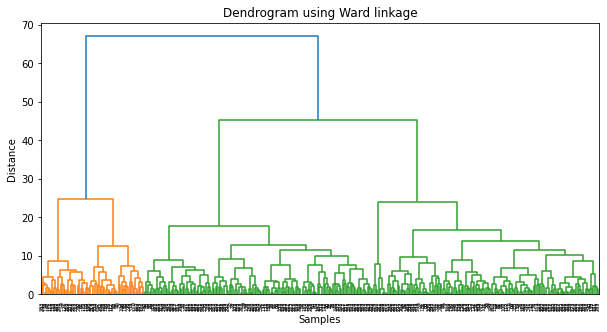

Cophenetic correlation coefficient for Ward linkage: 0.7931014735494532


In [31]:
# Calculate the pairwise distances using Euclidean distance metric
eucli_dist = euclidean_distances(df_scaled)

# Consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(356, k=1)]

# Perform hierarchical clustering using Ward linkage
link_mat = linkage(dist_array, method='ward')

# Calculate the cophenetic correlation coefficient for Ward linkage
# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(link_mat)
plt.title('Dendrogram using Ward linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

print('Cophenetic correlation coefficient for Ward linkage:', coeff)

f. Draw dendrogram for the above five clustering methods. (2 marks)

The linkage matrix for Ward linkage method 
 [[  99.          100.            0.            2.        ]
 [ 507.          508.            0.            2.        ]
 [  52.           53.            0.            2.        ]
 ...
 [1022.         1026.           29.88137513  262.        ]
 [1028.         1030.           53.43792201  430.        ]
 [1029.         1031.           79.02677313  517.        ]]


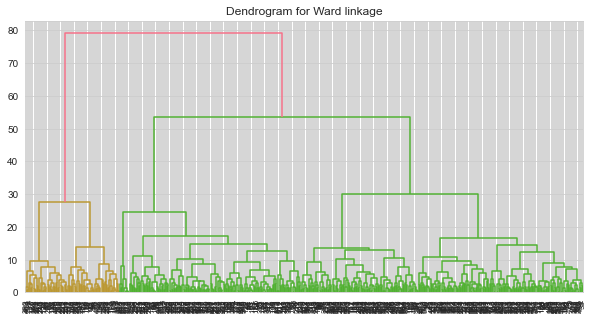

The linkage matrix for complete linkage method 
 [[ 213.          222.            0.            2.        ]
 [  52.           53.            0.            2.        ]
 [ 507.          508.            0.            2.        ]
 ...
 [1005.         1028.            9.89409589  249.        ]
 [1027.         1030.           10.31803614  432.        ]
 [1029.         1031.           13.14714114  517.        ]]


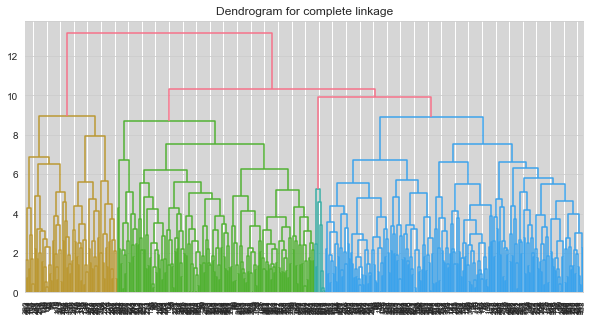

The linkage matrix for Average linkage method 
 [[ 213.          222.            0.            2.        ]
 [  52.           53.            0.            2.        ]
 [ 507.          508.            0.            2.        ]
 ...
 [1015.         1028.            6.2999376    88.        ]
 [1020.         1029.            7.24020349  429.        ]
 [1030.         1031.            7.99332921  517.        ]]


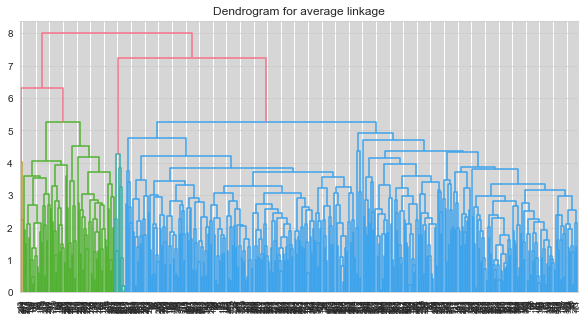

The linkage matrix for Centroid linkage method 
 [[ 276.          278.            0.            2.        ]
 [ 302.          303.            0.            2.        ]
 [  99.          100.            0.            2.        ]
 ...
 [1024.         1026.            5.18095701   88.        ]
 [1023.         1029.            6.08312292  429.        ]
 [1030.         1031.            6.51733403  517.        ]]


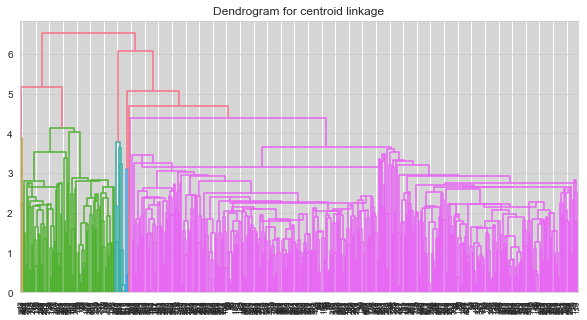

The linkage matrix for Single linkage method 
 [[ 213.          222.            0.            2.        ]
 [ 214.          215.            0.            2.        ]
 [  99.          100.            0.            2.        ]
 ...
 [ 273.         1029.            3.03892784    9.        ]
 [ 516.         1028.            3.17711696  508.        ]
 [1030.         1031.            3.52502416  517.        ]]


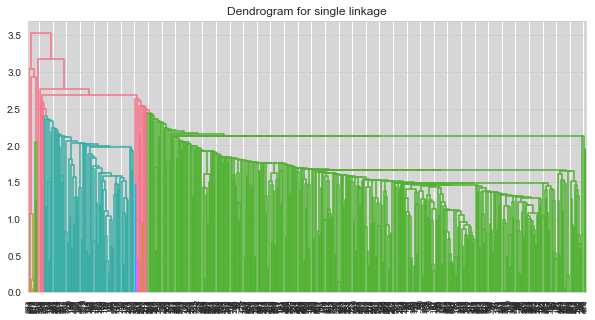

In [32]:
from scipy.cluster.hierarchy import dendrogram

# Linkage methods of agglomerative clustering
sns.set_style('whitegrid')
sns.set_palette('husl')

# Ward linkage method
linkage_ward = linkage(df_scaled , method='ward')

# Printing the linkage matrix for the Ward linkage method
print("The linkage matrix for Ward linkage method \n", linkage_ward)

# Draw dendrogram for Ward linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for Ward linkage')
dendrogram(linkage_ward, leaf_rotation=90, leaf_font_size=8)
plt.show()

# Complete Linkage method
linkage_complete = linkage(df_scaled , method='complete')

# Printing the linkage matrix for the complete linkage method
print("The linkage matrix for complete linkage method \n", linkage_complete)

# Draw dendrogram for complete linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for complete linkage')
dendrogram(linkage_complete, leaf_rotation=90, leaf_font_size=8)
plt.show()

# Average Linkage method
linkage_average = linkage(df_scaled , method='average')

# Printing the linkage matrix for the Average linkage method
print("The linkage matrix for Average linkage method \n", linkage_average)

# Draw dendrogram for average linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for average linkage')
dendrogram(linkage_average, leaf_rotation=90, leaf_font_size=8)
plt.show()

# centriod linkage method
linkage_centriod = linkage(df_scaled , method='centroid')

# Printing the linkage matrix for the Centroid linkage method
print("The linkage matrix for Centroid linkage method \n", linkage_centriod)

# Draw dendrogram for centroid linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for centroid linkage')
dendrogram(linkage_centroid, leaf_rotation=90, leaf_font_size=8)
plt.show()


# Single Linkage method
linkage_single = linkage(df_scaled , method='single')

# Printing the linkage matrix for the Single linkage method
print("The linkage matrix for Single linkage method \n", linkage_single)

# Draw dendrogram for single linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for single linkage')
dendrogram(linkage_single, leaf_rotation=90, leaf_font_size=8)
plt.show()


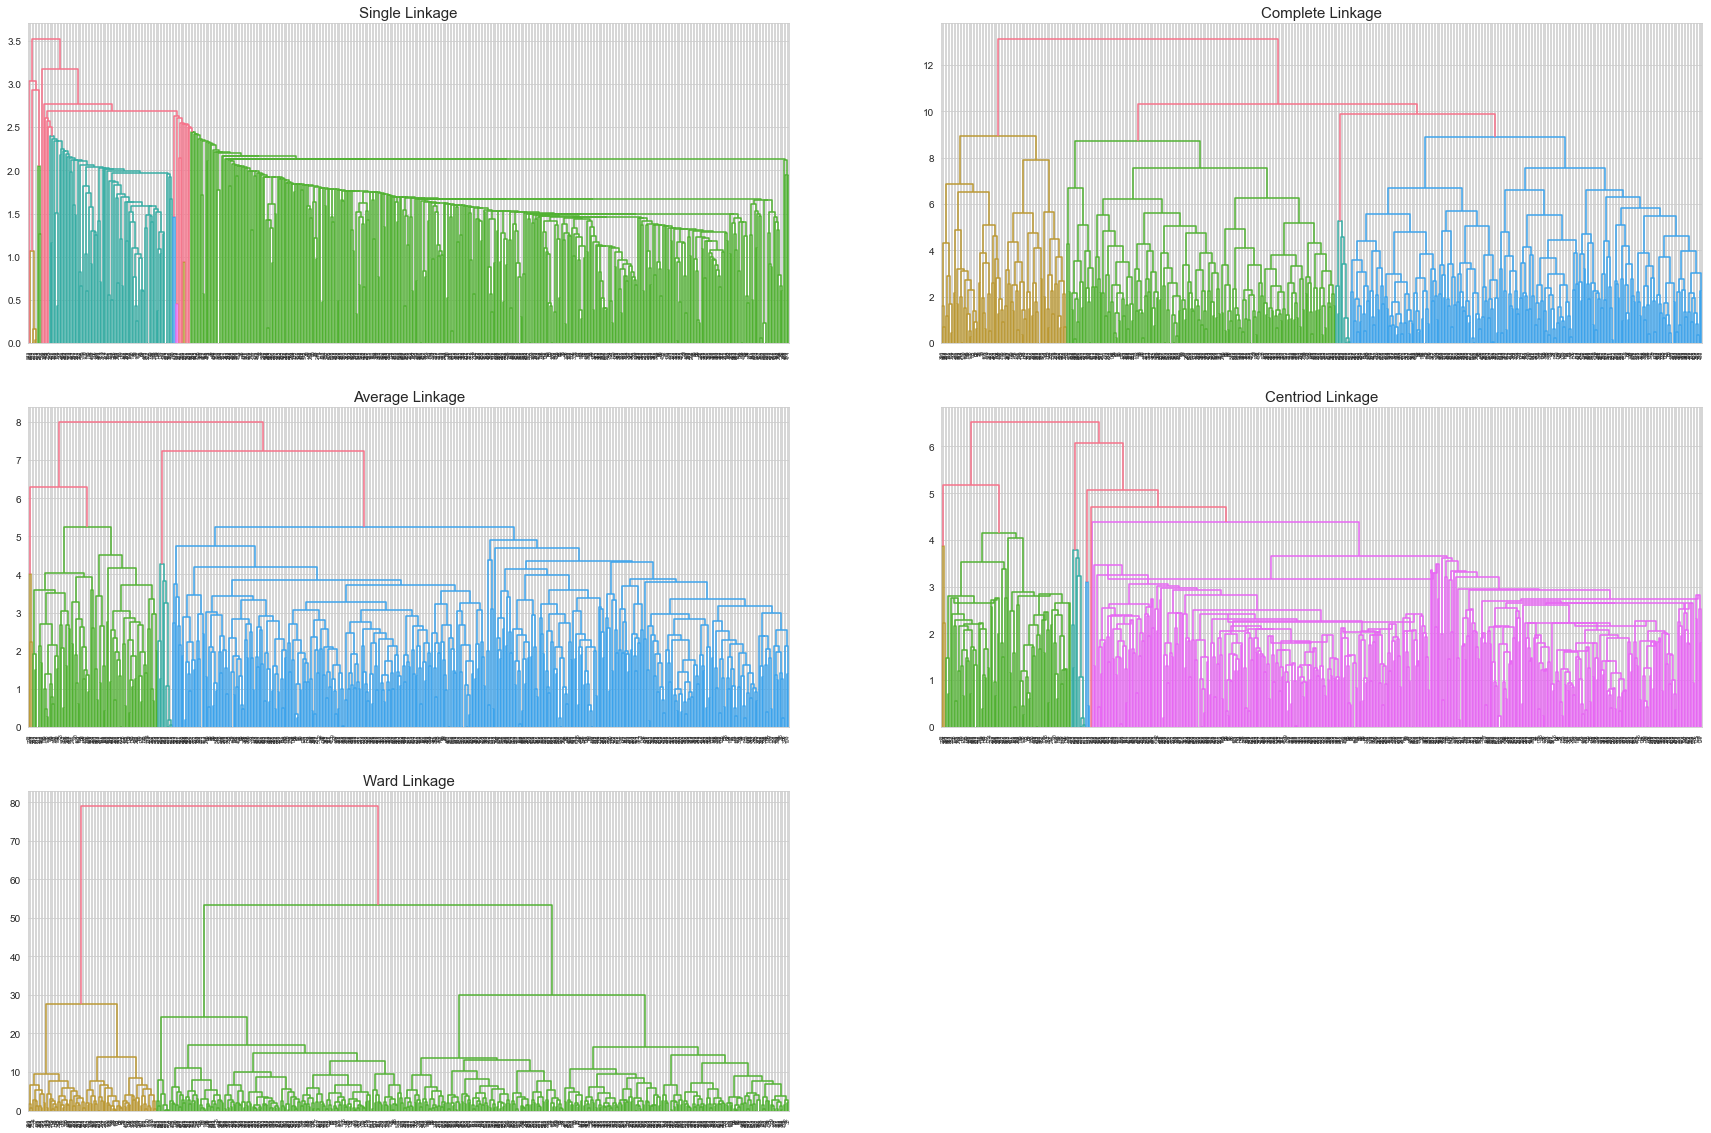

In [33]:
# Plotting the Dendrogram for above five linkage methods
sns.set_style('whitegrid')
sns.set_palette('husl')

#set the figure size
plt.figure(figsize= (30,20))

# Dendrogram for Ward linkage method
plt.subplot(3,2,5);dendrogram(linkage_ward);plt.title('Ward Linkage', fontsize= 15)

# Dendrogram for Complete linkage method
plt.subplot(3,2,2);dendrogram(linkage_complete);plt.title('Complete Linkage', fontsize= 15)

# Dendrogram for Average linkage method
plt.subplot(3,2,3);dendrogram(linkage_average);plt.title('Average Linkage', fontsize= 15)

# Dendrogram for Centriod linkage method
plt.subplot(3,2,4);dendrogram(linkage_centriod);plt.title('Centriod Linkage', fontsize= 15)


# Dendrogram for single linkage method
plt.subplot(3,2,1);dendrogram(linkage_single);plt.title('Single Linkage', fontsize= 15)

# Show the plot
plt.show()

g. Calculate Cophenet Coorelation coefficient for the above five methods. (4 marks)

In [34]:
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Calculate the pairwise distances
df_dist = pdist(df_scaled)

# Perform hierarchical clustering using Ward linkage
linkage_ward= linkage(df_dist, method='ward')

# Calculate the cophenetic correlation coefficient for Ward linkage
c, coph_dists = cophenet(linkage_ward, df_dist)
print('Cophenetic correlation coefficient for Ward linkage :', round(c, 4))

# Perform hierarchical clustering using single linkage
linkage_single = linkage(df_dist, method='single')

# Calculate the cophenetic correlation coefficient for single linkage
c, coph_dists = cophenet(linkage_single, df_dist)
print('Cophenetic correlation coefficient for single linkage :', round(c, 4))

# Perform hierarchical clustering using complete linkage
linkage_centroid = linkage(df_dist, method='complete')

# Calculate the cophenetic correlation coefficient for complete linkage
c, coph_dists = cophenet(linkage_complete, df_dist)
print('Cophenetic correlation coefficient for complete linkage :', round(c, 4))

# Perform hierarchical clustering using average linkage
linkage_average = linkage(df_dist, method='average')

# Calculate the cophenetic correlation coefficient for average linkage
c, coph_dists = cophenet(linkage_average, df_dist)
print('Cophenetic correlation coefficient for average linkage :', round(c, 4))

# Perform hierarchical clustering using centroid linkage
linkage_centroid = linkage(df_dist, method='centroid')

# Calculate the cophenetic correlation coefficient for centroid linkage
c, coph_dists = cophenet(linkage_centroid, df_dist)
print('Cophenetic correlation coefficient for centroid linkage :', round(c, 4))


Cophenetic correlation coefficient for Ward linkage : 0.7794
Cophenetic correlation coefficient for single linkage : 0.7205
Cophenetic correlation coefficient for complete linkage : 0.766
Cophenetic correlation coefficient for average linkage : 0.8363
Cophenetic correlation coefficient for centroid linkage : 0.8329


In [35]:
from sklearn.metrics import silhouette_score

K = range(2, 7)  # number of clusters to try
linkage_methods = ['ward', 'complete', 'average', 'single']  # linkage methods to try

silhouette_scores = []  # list to store silhouette scores

# Iterate over each linkage method
for method in linkage_methods:
    scores = []
    # Iterate over each number of clusters
    for k in K:
        # Create clustering object and fit to data
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = clustering.fit_predict(df_scaled)
        
        # Calculate silhouette score and append to list
        score = silhouette_score(df_scaled, labels)
        scores.append(score)
        
    # Append list of scores for current linkage method to silhouette_scores
    silhouette_scores.append(scores)
    
    # Print results for current linkage method
    print(f"Linkage method: {method}")
    for k, score in zip(K, scores):
        print(f"Number of clusters: {k} -- Silhouette score: {score:.3f}")
    print()

Linkage method: ward
Number of clusters: 2 -- Silhouette score: 0.419
Number of clusters: 3 -- Silhouette score: 0.283
Number of clusters: 4 -- Silhouette score: 0.205
Number of clusters: 5 -- Silhouette score: 0.194
Number of clusters: 6 -- Silhouette score: 0.209

Linkage method: complete
Number of clusters: 2 -- Silhouette score: 0.418
Number of clusters: 3 -- Silhouette score: 0.257
Number of clusters: 4 -- Silhouette score: 0.270
Number of clusters: 5 -- Silhouette score: 0.248
Number of clusters: 6 -- Silhouette score: 0.171

Linkage method: average
Number of clusters: 2 -- Silhouette score: 0.416
Number of clusters: 3 -- Silhouette score: 0.365
Number of clusters: 4 -- Silhouette score: 0.276
Number of clusters: 5 -- Silhouette score: 0.254
Number of clusters: 6 -- Silhouette score: 0.256

Linkage method: single
Number of clusters: 2 -- Silhouette score: 0.293
Number of clusters: 3 -- Silhouette score: 0.208
Number of clusters: 4 -- Silhouette score: 0.199
Number of clusters: 5 

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

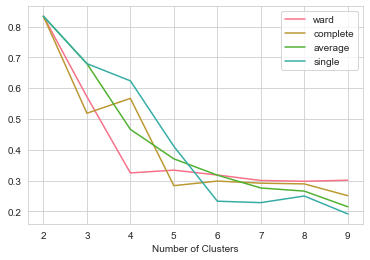

In [36]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

# Define range of cluster numbers to test
K = range(2, 10)

# Define linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']

# Calculate silhouette scores for each method and number of clusters
silhouette_scores = {}
for method in linkage_methods:
    scores = []
    for k in K:
        # Initialize Agglomerative Clustering algorithm
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        # Fit the algorithm on data and get cluster labels
        labels = clustering.fit_predict(X)
        # Calculate silhouette score
        score = silhouette_score(X, labels)
        scores.append(score)
    silhouette_scores[method] = scores

# Plot the results
for method, scores in silhouette_scores.items():
    plt.plot(K, scores, label=method)
plt.legend()
plt.xlabel("Number of Clusters")
plt.ylabel

h. Plot the best method labels using the scatter plot. (3 marks)

In [48]:
sns.set_style('whitegrid')
sns.set_palette('husl')
# Agglomerative Clustering to generate the cluster labels

# The optimal number of cluster and the best linkage method is passed as input to AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2 , linkage='average')

# Fitting the datapoints
cluster.fit(df_scaled)

# The generated cluster lables are moved to the original dataset
df_copy['cluster'] = cluster.labels_

# Display the top 5 of the original dataset
df_copy.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


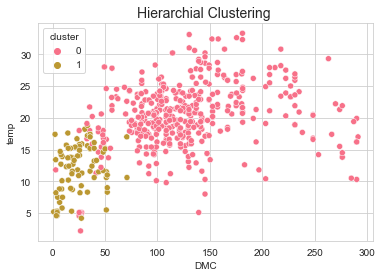

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('husl')


# Plot the clusters using a scatter plot
sns.scatterplot(x='DMC', y='temp', hue='cluster', data=df_copy)

# Set plot title and axis labels
plt.title('Hierarchial Clustering ', fontsize=14)
plt.xlabel('DMC')
plt.ylabel('temp')

plt.show()

In [69]:
df_copy['cluster'].value_counts()

0    429
1     88
Name: cluster, dtype: int64

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df_copy):
    # set the figure size
    plt.figure(figsize=(40, 30))

    # DMC Vs Temperature
    # Subplot with rows, columns and index
    plt.subplot(5, 2, 1)
    # Scatter plot for DMC and temperature and passing the cluster label as hue
    sns.scatterplot(x='DMC', y='temp', hue='cluster', data=df_copy)
    # set the label for X axis
    plt.xlabel('DMC', fontsize=15)
    # set the label for Y axis
    plt.ylabel('Temperature', fontsize=15)
    # set the title
    plt.title('Duff Mositure Code Vs Temperature', fontsize=20)

    # DMC Vs RH
    # Subplot with rows, columns and index
    plt.subplot(5, 2, 2)
    # Scatter plot for DMC and RH and passing the cluster label as hue
    sns.scatterplot(x='DMC', y='RH', hue='cluster', data=df_copy)
    # set the label for X axis
    plt.xlabel('DMC', fontsize=15)
    # set the label for Y axis
    plt.ylabel('RH', fontsize=15)
    # set the title
    plt.title('Duff Mositure Code Vs Relative Humidity', fontsize=20)

    # ISI Vs Wind
    # Subplot with rows, columns and index
    plt.subplot(5, 2, 3)
    # Scatter plot for ISI and wind and passing the cluster label as hue
    sns.scatterplot(x='ISI', y='wind', hue='cluster', data=df_copy)
    # set the label for X axis
    plt.xlabel('ISI', fontsize=15)
    # set the label for Y axis
    plt.ylabel('Wind', fontsize=15)
    # set the title
    plt.title('Initial Spread Index Vs Wind', fontsize=20)

    # DC Vs Temperature
    # Subplot with rows, columns and index
    plt.subplot(5, 2, 4)
    # Scatter plot for DC and Temperature and passing the cluster label as hue
    sns.scatterplot(x='DC', y='temp', hue='cluster', data=df_copy)
    # set the label for X axis
    plt.xlabel('DC', fontsize=15)
    # set the label for Y axis
    plt.ylabel('Temperature', fontsize=15)
    # set the title
    plt.title('Drought Code Vs Temperature', fontsize=20)

    # Show the plot
    plt.show()

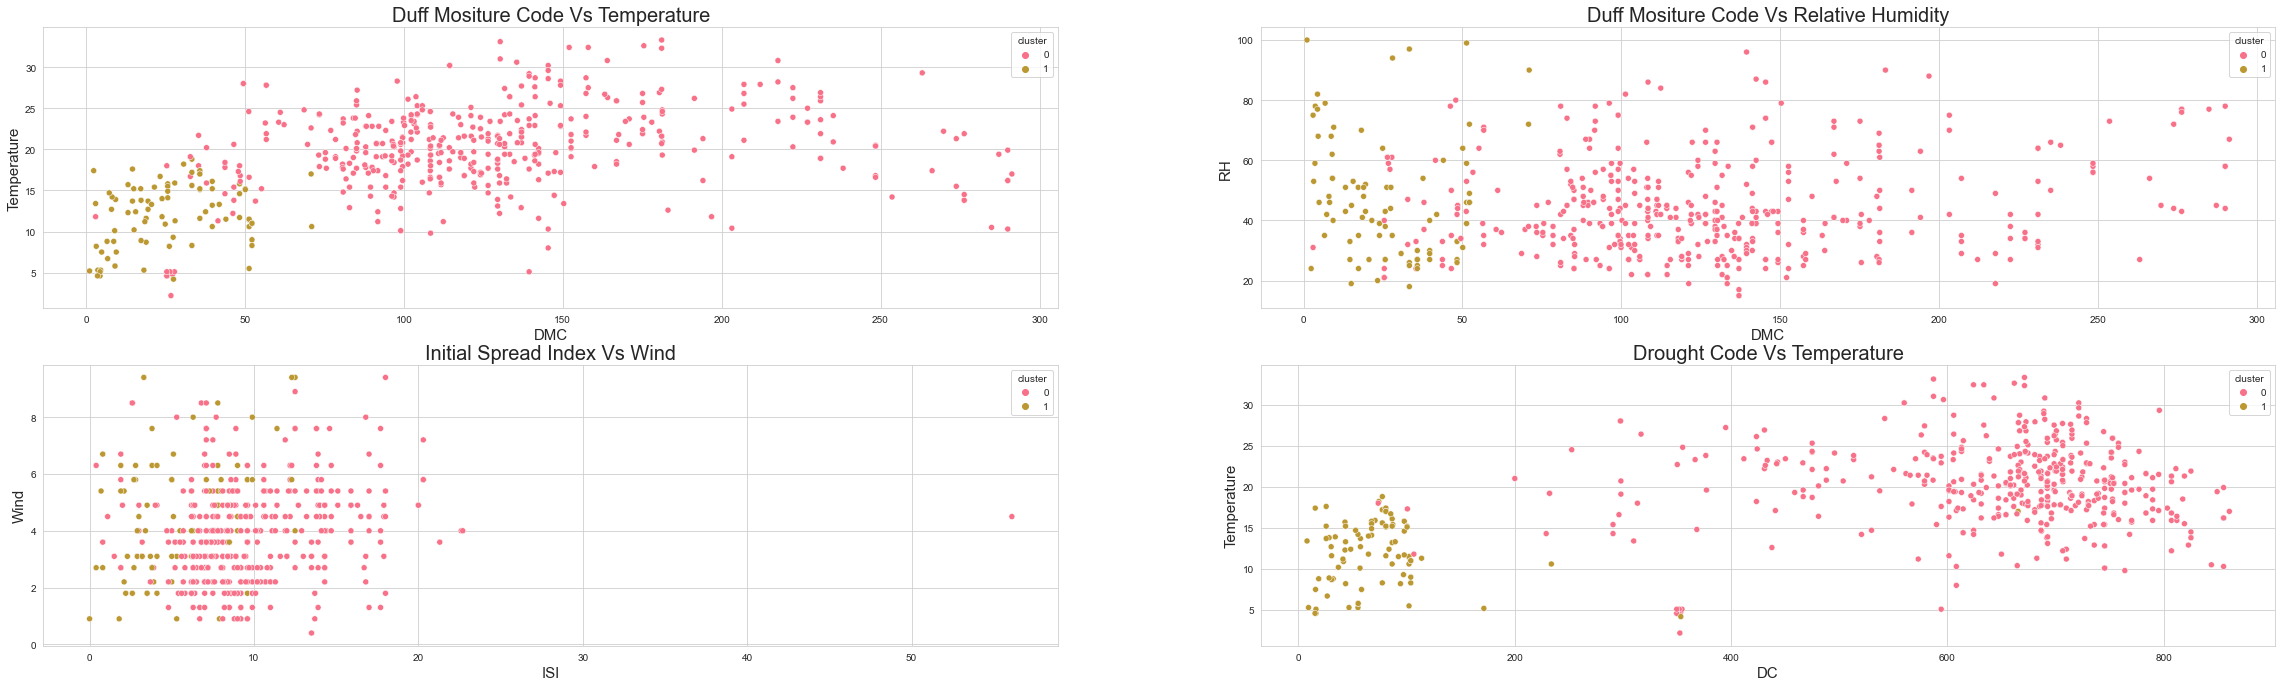

In [56]:
# Calling the plot_scatter method
plot_scatter(df_copy)

In [57]:
# Agglomerative Clustering to generate the cluster labels(using ward linkage method)

# The optimal number of cluster and the ward linkage method is passed as input to AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2 , linkage='ward')

# Fitting the datapoints
cluster.fit(df_scaled)

# The generated cluster lables are moved to the original dataset
df_copy['cluster'] = cluster.labels_

# Display the top 5 of the original dataset
df_copy.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


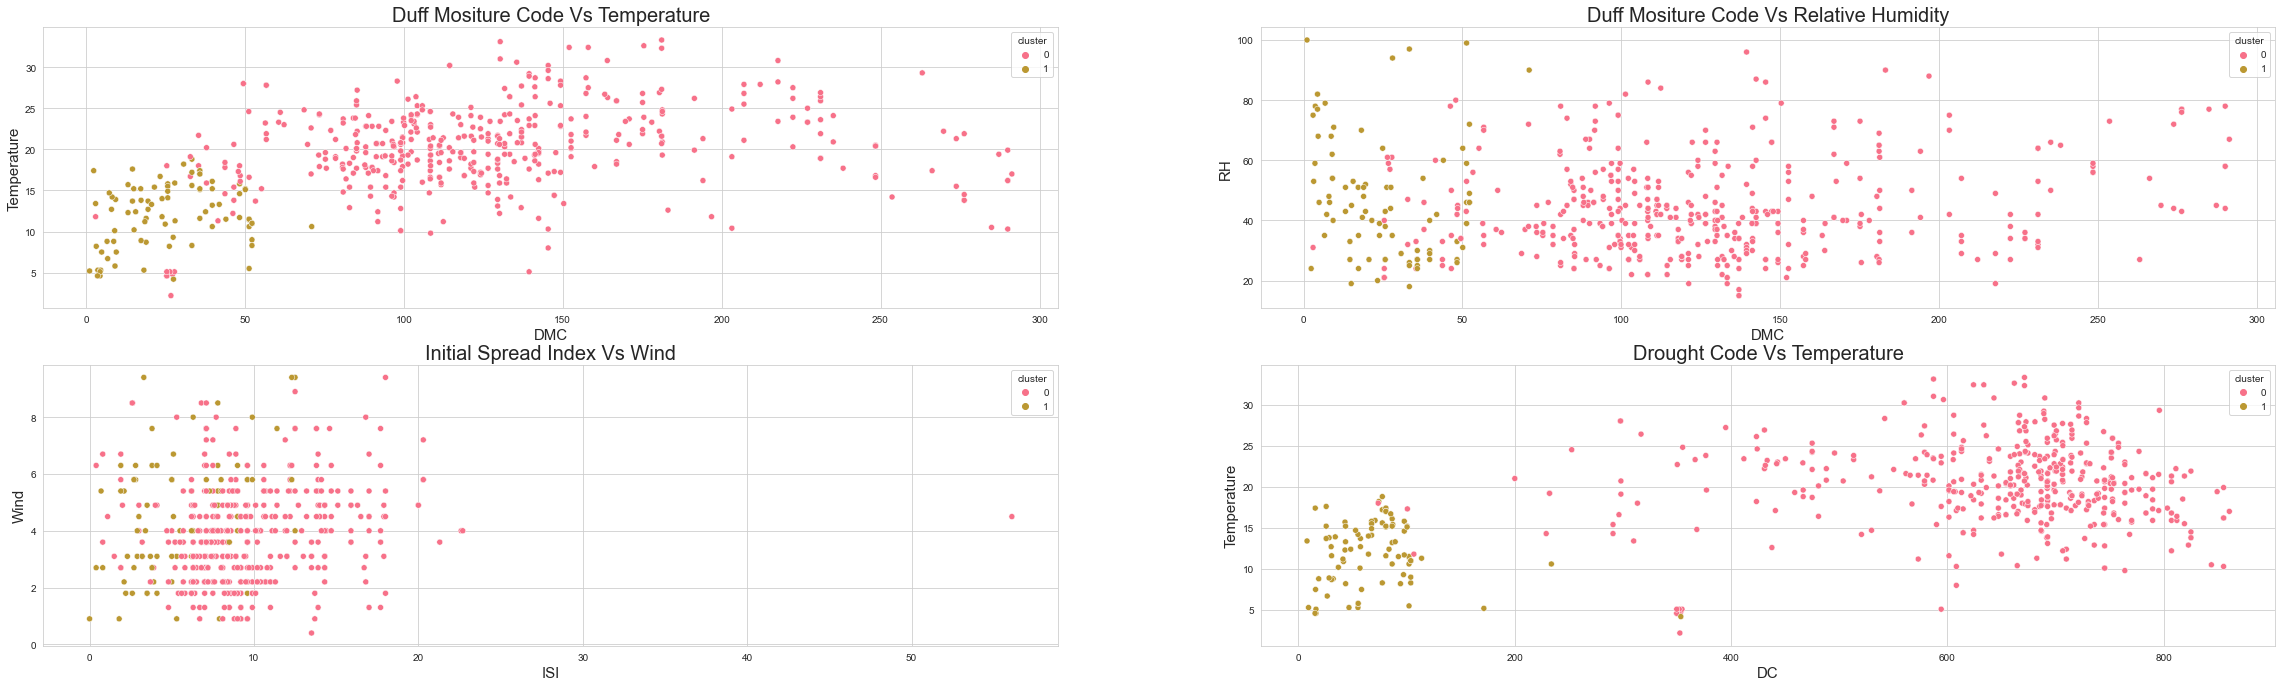

In [58]:
# Calling the plot_scatter method
plot_scatter(df_copy)

Observations & Inference:

As the best linkage method determined by comparing cophenetic coefficients - 'Average' doesn't represent the best cluster formation as seen visually. This can be traced to Ward being the best method under heavy presence of outliers. Although we have treated.

We confirmed this dropping the rain column. In this case, average clustering also did visually perform well. We infer that average clustering has limitations when it comes to heavily skewed columns (other linkage methods have this issue too).

We also understand that validation through visualization of clustering output and domain sense are important and indices such as cophenetic coefficient have limitations in capturing clustering performance and final choice of clustering methods.

We can also infer that 'rain' column doesn't contribute much to clustering performance.


We have also produced silhouette scores for all methods below to assess clustering quality and to validate optimum number of clusters as 2.

In [59]:
score = []
cluster = [2,3,4,5,6]
for i in cluster:
    
    model = AgglomerativeClustering(n_clusters=i , linkage='average')
    score.append(silhouette_score(df_scaled, model.fit_predict(df_scaled)))
print(score)  

[0.42074274154786734, 0.3668208147385425, 0.2802179771694668, 0.25611601556477803, 0.2573284374952577]


In [60]:
score = []
cluster = [2,3,4,5,6]
for i in cluster:
    
    model = AgglomerativeClustering(n_clusters=i , linkage='ward')
    score.append(silhouette_score(df_scaled, model.fit_predict(df_scaled)))
print(score) 

[0.42358311733460074, 0.28381119342101757, 0.20606944839119137, 0.1942813156336319, 0.20931031730011876]


In [61]:
score = []
cluster = [2,3,4,5,6]
for i in cluster:
    
    model = AgglomerativeClustering(n_clusters=i , linkage='complete')
    score.append(silhouette_score(df_scaled, model.fit_predict(df_scaled)))
print(score)  

[0.41035256463715986, 0.25872126153666514, 0.23844937906147312, 0.2433836030513431, 0.1729013463631364]


In [62]:
score = []
cluster = [2,3,4,5,6]
for i in cluster:
    
    model = AgglomerativeClustering(n_clusters=i , linkage='single')
    score.append(silhouette_score(df_scaled, model.fit_predict(df_scaled)))
print(score) 

[0.2915428747243912, 0.20660965782083296, 0.19726545242575297, 0.18508770678292574, 0.2996344513038321]
